### Student Test Score Prediction
--Kaggle

This notebook is for the playground competition in kaggle

The required installations:
1. pip install kaggle

In [ ]:
import zipfile
from pathlib import Path

zip_path = Path(r"C:\Users\sriku\Desktop\projects\Student_Scores\playground-series-s6e1.zip")
extract_to = Path(r"./")

extract_to.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzip complete")


Unzip complete


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [150]:
train_df=pd.read_csv('train.csv',index_col='id')
test_df=pd.read_csv('test.csv',index_col='id')

In [3]:
train_df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599


In [4]:
len(train_df),len(test_df)

(630000, 270000)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [6]:
train_df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [8]:
train_df.isnull().sum()

,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0
facility_rating,0


(array([73188., 75632., 78885.,     0., 80742., 86620.,     0., 74950.,
        82872., 77111.]),
 array([17. , 17.7, 18.4, 19.1, 19.8, 20.5, 21.2, 21.9, 22.6, 23.3, 24. ]),
 <BarContainer object of 10 artists>)

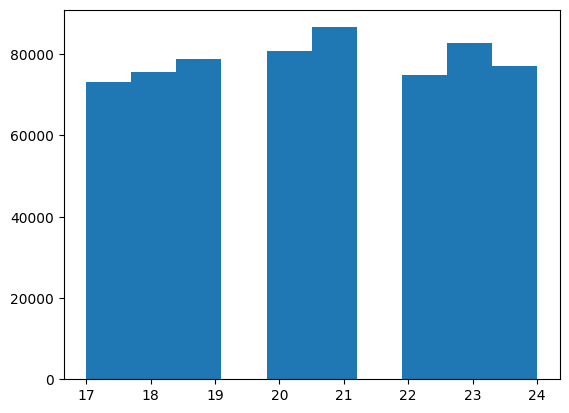

In [8]:
plt.hist(train_df.age)

In [9]:
train_df.gender.value_counts()

,count
gender,
other,211097
male,210593
female,208310


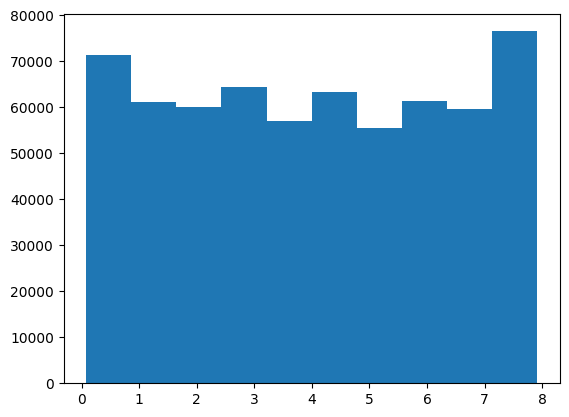

In [10]:
plt.hist(train_df.study_hours);

(array([64581., 60295., 61636., 65115., 47027., 64271., 60418., 63783.,
        67595., 75279.]),
 array([4.1 , 4.68, 5.26, 5.84, 6.42, 7.  , 7.58, 8.16, 8.74, 9.32, 9.9 ]),
 <BarContainer object of 10 artists>)

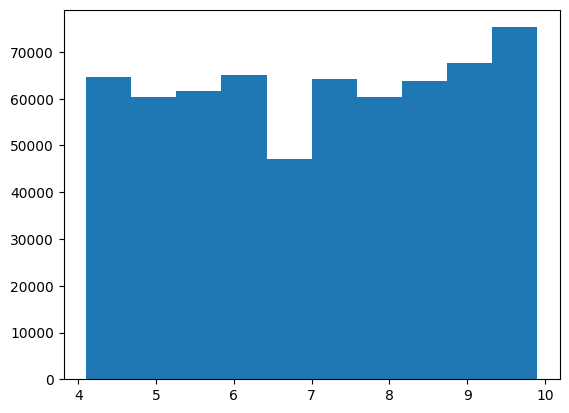

In [11]:
plt.hist(train_df.sleep_hours)

In [12]:
train_df.study_method.value_counts()

,count
study_method,
coaching,131697
self-study,131131
mixed,123086
group study,123009
online videos,121077


In [13]:
train_df.exam_difficulty.value_counts()
# exam score vastly depends on the toughness of the exam, this is factual and lets see what the data holds for us: hypothesis testing

,count
exam_difficulty,
moderate,353982
easy,176540
hard,99478


In [14]:
train_df.internet_access.value_counts()
# covariance with marks scored has to be testing to get to conclusions.

,count
internet_access,
yes,579423
no,50577


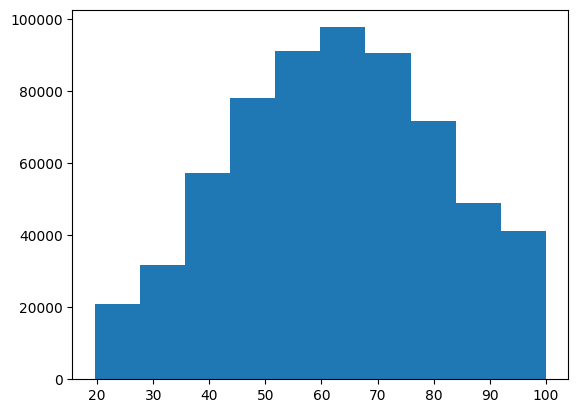

In [15]:
plt.hist(train_df.exam_score);

A nice normal distribution skewed towards right, rightfully so, could mean two things, either students are competent or the exam difficulty is mostly easy to medium -> which is the first impression.

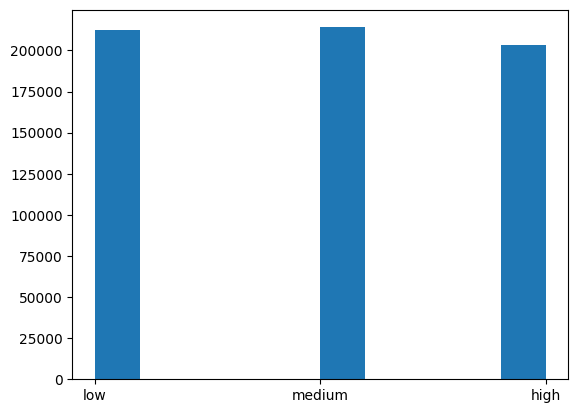

In [16]:
plt.hist(train_df.facility_rating);

In [17]:
train_df.course.value_counts()

,count
course,
b.tech,131236
b.sc,111554
b.com,110932
bca,88721
bba,75644
ba,61989
diploma,49924


# Regression Problem

1. Feature engineering - numerical and categorical
2. model selection, increment- exploring all state of the art, from linear, polynomial, randomforest, catboost, neural networks

In [151]:
# feature engineering
dummies=train_df.select_dtypes(object).columns
dummies

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [152]:
dummies=dummies.drop("internet_access")
dummies=dummies.drop("sleep_quality")
dummies=dummies.drop("facility_rating")
dummies=dummies.drop("exam_difficulty")
ordinal_cols=["sleep_quality","facility_rating","exam_difficulty","internet_access"]

In [153]:
ordinal_en=sklearn.preprocessing.OrdinalEncoder()
ordinal_en.fit(train_df[ordinal_cols])
train_df[ordinal_cols]=ordinal_en.transform(train_df[ordinal_cols])

In [154]:
train_df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,0.0,4.9,0.0,online videos,1.0,0.0,78.300
1,18,other,diploma,4.95,94.8,1.0,4.7,2.0,self-study,2.0,2.0,46.700
2,20,female,b.sc,4.68,92.6,1.0,5.8,2.0,coaching,0.0,2.0,99.000
3,19,male,b.sc,2.00,49.5,1.0,8.3,0.0,group study,0.0,2.0,63.900
4,23,male,bca,7.65,86.9,1.0,9.6,1.0,self-study,0.0,0.0,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,1.0,4.1,1.0,mixed,0.0,2.0,69.500
629996,21,female,ba,7.08,54.4,1.0,4.5,0.0,mixed,1.0,2.0,78.900
629997,24,male,bca,0.64,44.2,1.0,4.3,2.0,online videos,1.0,2.0,19.599


In [155]:
df_encoded=pd.get_dummies(train_df,columns=dummies,drop_first=True,dtype=int)
df_encoded

,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,...,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
id,,,,,,,,,,,,,,,,,,,,,
0,21,7.91,98.8,0.0,4.9,0.0,1.0,0.0,78.300,0,...,1,0,0,0,0,0,0,0,1,0
1,18,4.95,94.8,1.0,4.7,2.0,2.0,2.0,46.700,0,...,0,0,0,0,0,1,0,0,0,1
2,20,4.68,92.6,1.0,5.8,2.0,0.0,2.0,99.000,0,...,1,0,0,0,0,0,0,0,0,0
3,19,2.00,49.5,1.0,8.3,0.0,0.0,2.0,63.900,1,...,1,0,0,0,0,0,1,0,0,0
4,23,7.65,86.9,1.0,9.6,1.0,0.0,0.0,100.000,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4.86,70.7,1.0,4.1,1.0,0.0,2.0,69.500,0,...,0,1,0,0,0,0,0,1,0,0
629996,21,7.08,54.4,1.0,4.5,0.0,1.0,2.0,78.900,0,...,0,0,1,0,0,0,0,1,0,0
629997,24,0.64,44.2,1.0,4.3,2.0,1.0,2.0,19.599,1,...,0,0,0,0,1,0,0,0,1,0


In [156]:
df_encoded.columns

Index(['age', 'study_hours', 'class_attendance', 'internet_access',
       'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty',
       'exam_score', 'gender_male', 'gender_other', 'course_b.sc',
       'course_b.tech', 'course_ba', 'course_bba', 'course_bca',
       'course_diploma', 'study_method_group study', 'study_method_mixed',
       'study_method_online videos', 'study_method_self-study'],
      dtype='object')

In [157]:
y=df_encoded.exam_score
df_encoded.drop(columns=["exam_score"],inplace=True)

In [158]:
df_encoded

,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
id,,,,,,,,,,,,,,,,,,,,
0,21,7.91,98.8,0.0,4.9,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
1,18,4.95,94.8,1.0,4.7,2.0,2.0,2.0,0,1,0,0,0,0,0,1,0,0,0,1
2,20,4.68,92.6,1.0,5.8,2.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0
3,19,2.00,49.5,1.0,8.3,0.0,0.0,2.0,1,0,1,0,0,0,0,0,1,0,0,0
4,23,7.65,86.9,1.0,9.6,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4.86,70.7,1.0,4.1,1.0,0.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0
629996,21,7.08,54.4,1.0,4.5,0.0,1.0,2.0,0,0,0,0,1,0,0,0,0,1,0,0
629997,24,0.64,44.2,1.0,4.3,2.0,1.0,2.0,1,0,0,0,0,0,1,0,0,0,1,0


In [9]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
# it has to be grid search given the internal Crossvalidation that it performs, returns the best model with hyperparameters

In [24]:
linRegressor=LinearRegression()

In [25]:
params={
    "positive":[True,False]
}

In [26]:
grid=GridSearchCV(
    estimator=linRegressor,
    param_grid=params,
    cv=5,
    scoring=None,
    n_jobs=-1
)
grid.fit(df_encoded,y)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'positive': [True, False]})

In [27]:
linRegressor=grid.best_estimator_

In [28]:
linRegressor.fit(df_encoded,y)

LinearRegression()

In [29]:
linRegressor.score(df_encoded,y)

0.7722986954037258

##### Model 2: Polynomail regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("polyFeat",PolynomialFeatures(degree=2)),
    ("lr",LinearRegression())
])

In [12]:
params={
    "polyFeat__degree":[1,6],
    "polyFeat__include_bias":[False],
    "lr__fit_intercept":[True,False]
}

In [14]:
grid=RandomizedSearchCV(
    pipe,
    params,
    cv=3,
    scoring=None,
    n_jobs=-1,
    n_iter=2
)
grid.fit(df_encoded,y)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [ ]:
polynomial_regressor=grid.best_estimator_

In [18]:
polynomial_regressor=pipe

In [19]:
polynomial_regressor.fit(df_encoded,y)
polynomial_regressor.score(df_encoded,y)

0.7729165359444641

##### Model 3: RandomForestRegressor

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [160]:
rfRegressor=RandomForestRegressor()

In [161]:
params={
    "n_estimators":[50,80],
    "max_depth":[None,10,20,30],
}

In [162]:
rfRegressor.fit(df_encoded,y)

RandomForestRegressor()

In [163]:
rfRegressor.score(df_encoded,y)

0.9672060916296497

In [164]:
root_mean_squared_error(y,rfRegressor.predict(df_encoded))

3.425672559143405

##### Model 4: Gradient Boosting Regressor

Check out sklearn's gradient booster

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
reg=GradientBoostingRegressor()
model=Pipeline([
    ("scaler",StandardScaler()),
    ("reg",reg)]
)

In [24]:
model.fit(df_encoded,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', GradientBoostingRegressor())])

In [25]:
model.score(df_encoded,y)

0.7735417211257661

#####Data insights for model selection

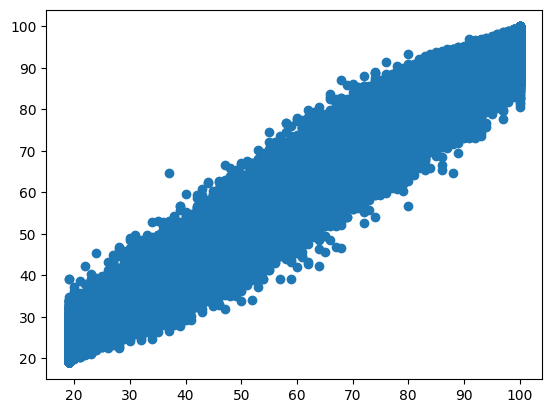

In [40]:
plt.scatter(y,rfRegressor.predict(df_encoded))

In [9]:
train_df_oneHot=pd.get_dummies(train_df,columns=dummies).astype(int)

In [10]:
train_df_oneHot.corr().exam_score.sort_values(ascending=False)

,exam_score
exam_score,1.000000
study_hours,0.757081
class_attendance,0.361271
sleep_quality_good,0.203306
study_method_coaching,0.183951
sleep_hours,0.163635
facility_rating_high,0.153527
study_method_mixed,0.067722
facility_rating_medium,0.019968
course_bba,0.013817


In [11]:
train_df_oneHot.drop(columns=["exam_score"],inplace=True)

##### Neural Network model

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [18]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
x=tf.keras.layers.Dense(100,activation="relu")(input_layer)
output_layer=tf.keras.layers.Dense(1,activation="linear")(x)

nn_model=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [19]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


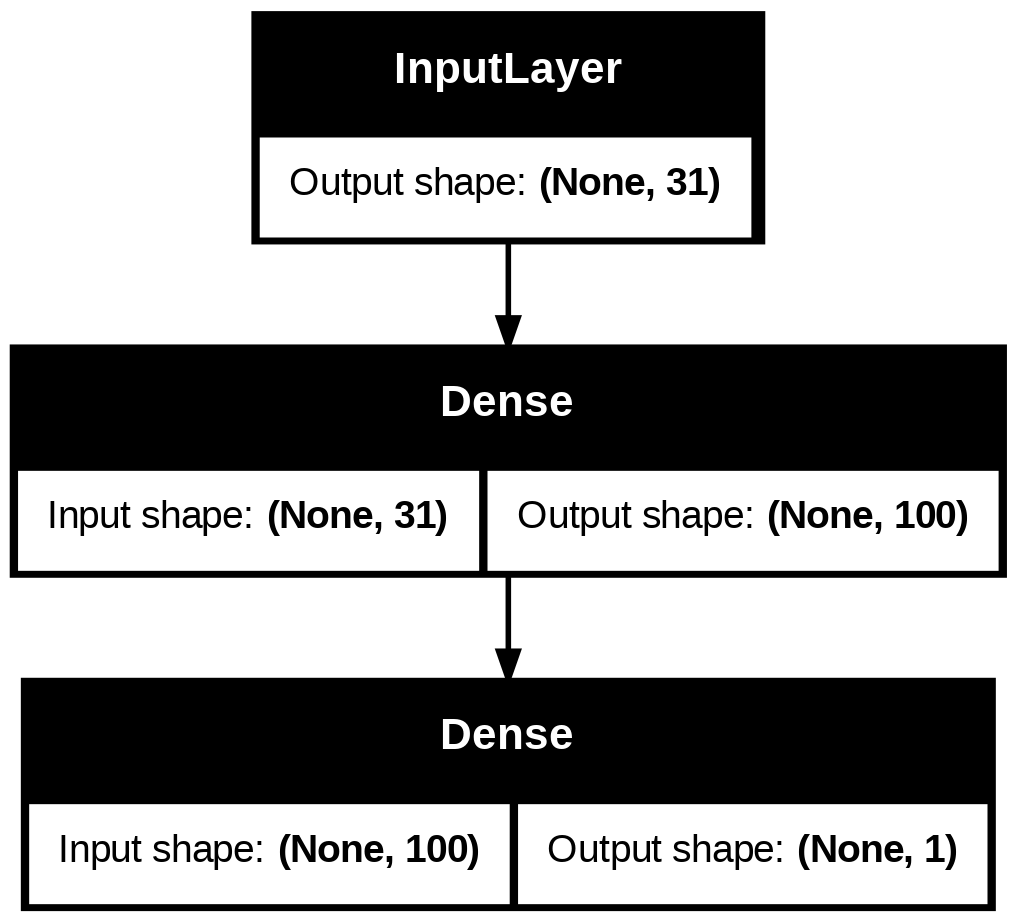

In [21]:
plot_model(
    nn_model,
    show_shapes=True)

In [15]:
callbacks_list=[
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="loss",
        factor=0.1,
        patience=1,
        verbose=1,
        mode="auto",
        min_delta=0.0001
    )
]

In [16]:
nn_model.fit(train_df_oneHot,y,epochs=10,batch_size=32,verbose=1,callbacks=callbacks_list)

Epoch 1/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 99.8543 - root_mean_squared_error: 9.8278 - learning_rate: 0.0100
Epoch 2/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 83.5019 - root_mean_squared_error: 9.1379 - learning_rate: 0.0100
Epoch 3/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - loss: 83.1097 - root_mean_squared_error: 9.1164 - learning_rate: 0.0100
Epoch 4/10
19680/19688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.0327 - root_mean_squared_error: 9.1122
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 83.0326 - root_mean_squared_error: 9.1122 - learning_rate: 0.0100
Epoch 5/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 82.0818 - root_mean_squared_error: 9.0599 - learning_rate: 1.0000e-03
Epoch 6/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 81.9001 - root_mean_squared_error: 9.0498 - learning_rate: 1.0000e-03
Epoch 7/10
19676/19688 ━━━━━━━━━━━━

### Adding normalization layer to check improvement in performance

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_text,y_train,y_test=train_test_split(
    train_df_oneHot,
    y,
    test_size=0.2,
    random_state=42)

In [22]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
x=tf.keras.layers.Normalization()(input_layer)
x=tf.keras.layers.Dense(100,activation="relu")(x)
output_layer=tf.keras.layers.Dense(1,activation="linear")(x)

normNN_model=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [23]:
normNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

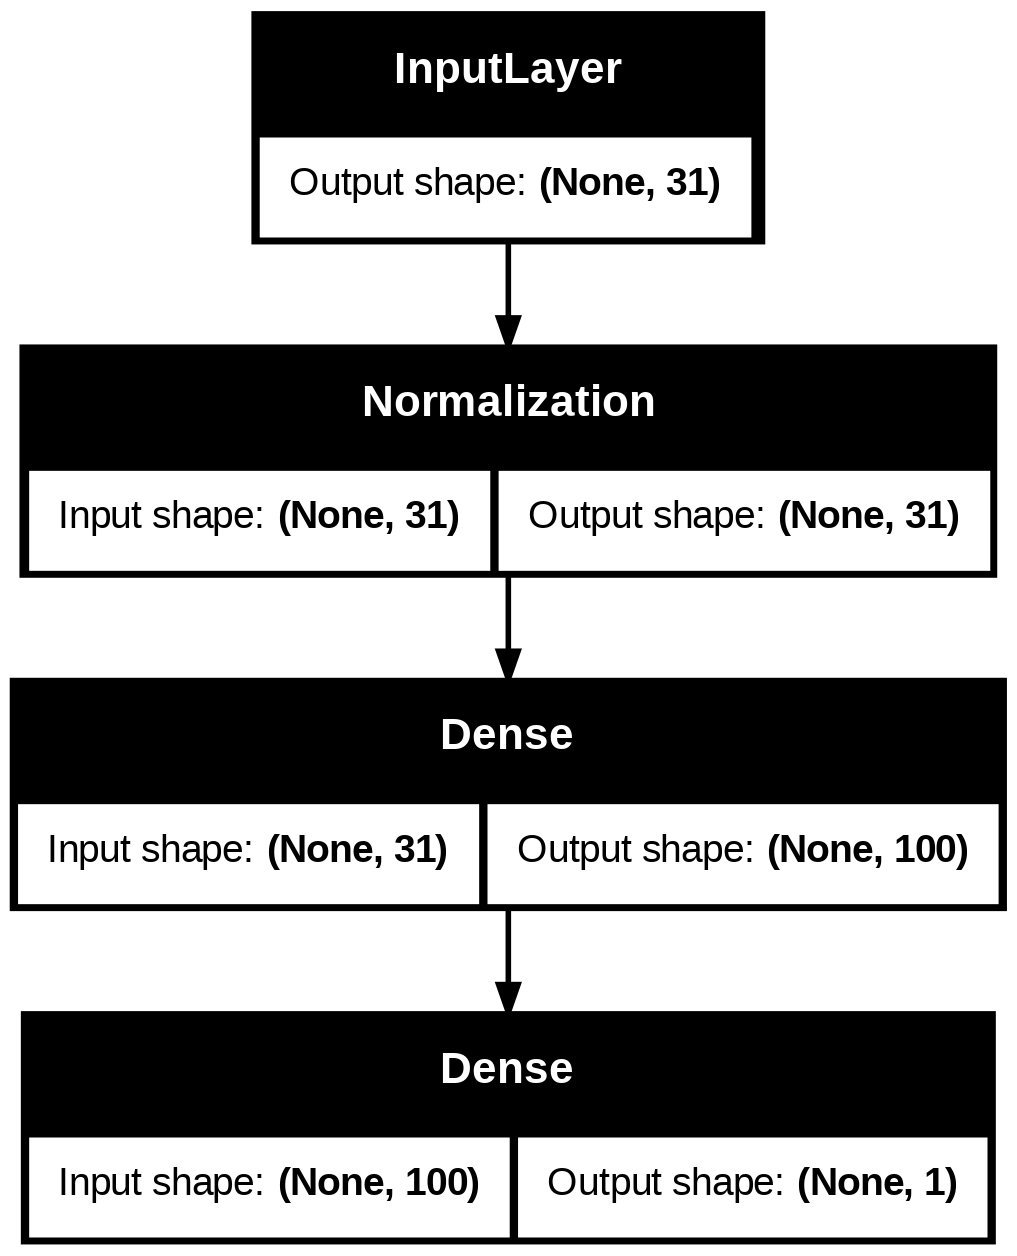

In [24]:
plot_model(
    normNN_model,
    show_shapes=True
)

In [64]:
callbacks_list=[
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="loss",
        factor=0.5,
        patience=2,
        verbose=1,
        threshold=0.000001
    )
]

In [33]:
normNN=normNN_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list,
    validation_data=(x_text,y_test)
)

Epoch 1/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 101.4871 - root_mean_squared_error: 9.8976 - val_loss: 85.2416 - val_root_mean_squared_error: 9.2326 - learning_rate: 0.0100
Epoch 2/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 83.7677 - root_mean_squared_error: 9.1524 - val_loss: 90.7839 - val_root_mean_squared_error: 9.5281 - learning_rate: 0.0100
Epoch 3/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 83.0010 - root_mean_squared_error: 9.1105 - val_loss: 85.8014 - val_root_mean_squared_error: 9.2629 - learning_rate: 0.0100
Epoch 4/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 83.1465 - root_mean_squared_error: 9.1185 - val_loss: 83.1026 - val_root_mean_squared_error: 9.1161 - learning_rate: 0.0100
Epoch 5/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 83.2107 - root_mean_squared_error: 9.1220 - val_loss: 83.0113 - val_root_mean_squared_error: 9.1111 - learning_rate: 0.0100
Epoch 6/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/st

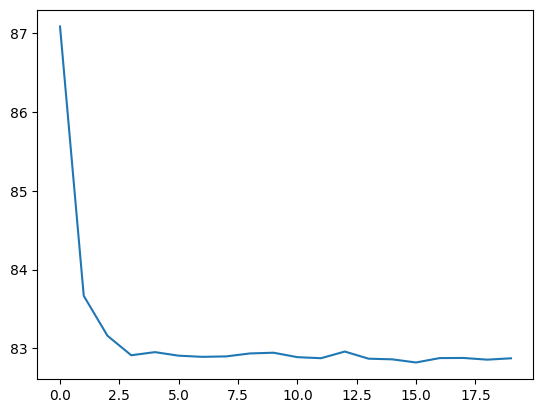

In [43]:
plt.plot(normNN.history["loss"])

In [34]:
train_df_oneHot.shape[1]

30

In [65]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
#x=tf.keras.layers.Normalization()(input_layer)
x=tf.keras.layers.Dense(32,activation="relu")(input_layer)
x=tf.keras.layers.Dense(16,activation="relu")(x)
x=tf.keras.layers.Dense(8,activation="relu")(x)
output_layer=tf.keras.layers.Dense(1,activation="linear")(x)

normNN_model1=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [66]:
normNN_model1.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [67]:
normNN1=normNN_model1.fit(
    train_df_oneHot,
    y,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list,
    validation_split=0.2
)

Epoch 1/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 97.5036 - root_mean_squared_error: 9.7210 - val_loss: 81.9374 - val_root_mean_squared_error: 9.0519 - learning_rate: 0.1000
Epoch 2/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 82.5109 - root_mean_squared_error: 9.0835 - val_loss: 81.7911 - val_root_mean_squared_error: 9.0438 - learning_rate: 0.1000
Epoch 3/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 82.2231 - root_mean_squared_error: 9.0677 - val_loss: 81.8110 - val_root_mean_squared_error: 9.0449 - learning_rate: 0.1000
Epoch 4/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 82.3747 - root_mean_squared_error: 9.0760 - val_loss: 81.9081 - val_root_mean_squared_error: 9.0503 - learning_rate: 0.1000
Epoch 5/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 81.9738 - root_mean_squared_error: 9.0539 - val_loss: 81.7319 - val_root_mean_squared_error: 9.0406 - learning_rate: 0.1000
Epoch 6/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/ste

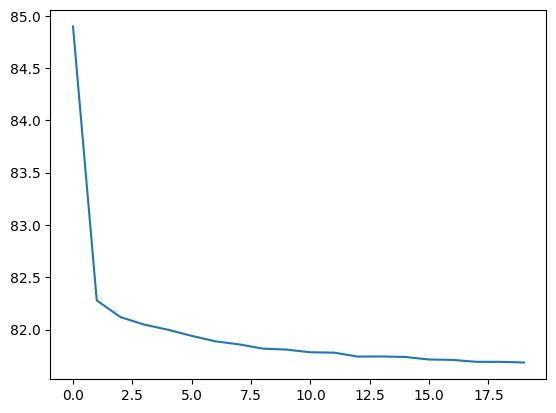

In [68]:
plt.plot(normNN1.history["loss"])

In [69]:
normNN_model1.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]

)

In [70]:
normNN1=normNN_model1.fit(
    train_df_oneHot,
    y,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list,
    validation_split=0.2
)

Epoch 1/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 81.6537 - root_mean_squared_error: 9.0362 - val_loss: 81.5798 - val_root_mean_squared_error: 9.0322 - learning_rate: 0.0100
Epoch 2/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 81.4268 - root_mean_squared_error: 9.0236 - val_loss: 81.6210 - val_root_mean_squared_error: 9.0344 - learning_rate: 0.0100
Epoch 3/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 81.5545 - root_mean_squared_error: 9.0307 - val_loss: 81.5651 - val_root_mean_squared_error: 9.0313 - learning_rate: 0.0100
Epoch 4/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 81.5275 - root_mean_squared_error: 9.0292 - val_loss: 81.6442 - val_root_mean_squared_error: 9.0357 - learning_rate: 0.0100
Epoch 5/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 81.6775 - root_mean_squared_error: 9.0375 - val_loss: 81.5535 - val_root_mean_squared_error: 9.0307 - learning_rate: 0.0100
Epoch 6/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/ste

In [22]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
x=tf.keras.layers.Dense(32,activation="relu")(input_layer)
x=tf.keras.layers.Dense(16,activation="relu")(x)
x=tf.keras.layers.Dense(8,activation="relu")(x)
output_layer=tf.keras.layers.Dense(1,activation="linear")(x)

NN_model_test=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [23]:
NN_model_test.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.5),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [24]:
NN_model_test.fit(
    train_df_oneHot[:200],
    y[:200],
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 98053.3125 - root_mean_squared_error: 295.9215
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1691.2683 - root_mean_squared_error: 40.0700 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 327.6766 - root_mean_squared_error: 18.0955 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 280.2059 - root_mean_squared_error: 16.7128 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 297.2314 - root_mean_squared_error: 17.2400 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301.5405 - root_mean_squared_error: 17.3619 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 279.9474 - root_mean_squared_error: 16.7303 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321.9031 - root_mean_squared_error: 17.8949 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301.0623 - root_mean_squared_error: 17.3423 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 339.6517 - root_mean_squared_er

### Model 5:

I need to change the architecture of the model, the experiments point out the inefficiency of the model architexture to learn the complexity of dataset.

The architecture needs to be wider than being deeper, reason being deeper models becomes hard to train as more complex architecture higher amount of parameters to learn from.

In [28]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
x=tf.keras.layers.Dense(units=512,activation="relu")(input_layer)
x=tf.keras.layers.Dense(1,activation="sigmoid")(x)
output_layer=tf.keras.layers.Lambda(lambda x:x*100)(x)

NN_model_5=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [29]:
NN_model_5.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
    loss=tf.keras.losses.Huber(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

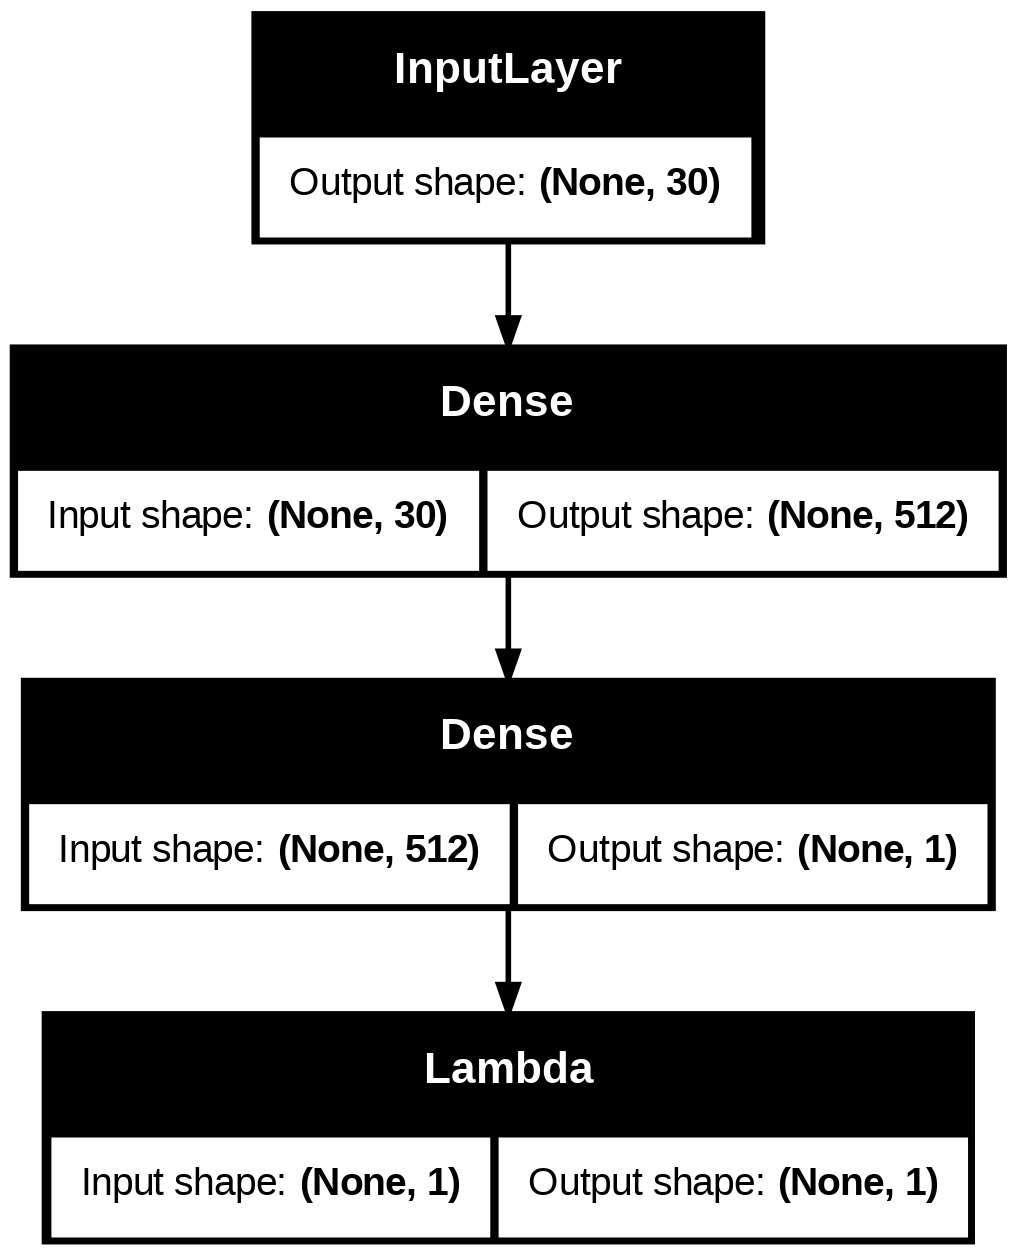

In [30]:
plot_model(NN_model_5,show_shapes=True)

In [31]:
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",   # <--- crucial change
        factor=0.1,
        patience=2,           # wait a couple epochs
        verbose=1,
        mode="min",
        min_delta=0.01,       # meaningful improvement threshold
        cooldown=0,
        min_lr=1e-6
    )
]


In [32]:
NN_model_5.fit(
    train_df_oneHot,
    y,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks_list
)

Epoch 1/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 35.4977 - root_mean_squared_error: 40.9877 - val_loss: 7.1714 - val_root_mean_squared_error: 9.5263 - learning_rate: 0.0100
Epoch 2/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 6.9952 - root_mean_squared_error: 9.3353 - val_loss: 6.8425 - val_root_mean_squared_error: 9.1365 - learning_rate: 0.0100
Epoch 3/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 6.8756 - root_mean_squared_error: 9.1895 - val_loss: 6.7765 - val_root_mean_squared_error: 9.0629 - learning_rate: 0.0100
Epoch 4/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 6.8438 - root_mean_squared_error: 9.1529 - val_loss: 7.0587 - val_root_mean_squared_error: 9.4354 - learning_rate: 0.0100
Epoch 5/20
15725/15750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8240 - root_mean_squared_error: 9.1395
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 6.8240 - root_m

#### Model failed: another model
planning to use residuals, just in case it might be useful, will be cutting down on the number of parameters for now.

In [99]:
from sklearn.preprocessing import StandardScaler
SSc=StandardScaler()
SSc.fit(train_df_oneHot)

StandardScaler()

In [178]:
input_layer=tf.keras.layers.Input(shape=(df_encoded.shape[1],))

x=tf.keras.layers.Dense(units=1024,activation="elu")(input_layer)
x=tf.keras.layers.Dense(units=1024,activation='elu')(x)
output_layer=tf.keras.layers.Dense(units=1)(x)
#output_layer=tf.keras.layers.Lambda(lambda x:x*100)(x)

NN_model_6=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [179]:
NN_model_6.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [180]:
history=NN_model_6.fit(
    df_encoded,
    y,
    epochs=20,
    batch_size=256,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks_list)

Epoch 1/20
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 101s 50ms/step - loss: 156.3116 - root_mean_squared_error: 12.0046 - val_loss: 89.8185 - val_root_mean_squared_error: 9.4773 - learning_rate: 0.0010
Epoch 2/20
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 102s 52ms/step - loss: 87.3387 - root_mean_squared_error: 9.3451 - val_loss: 82.4321 - val_root_mean_squared_error: 9.0792 - learning_rate: 0.0010
Epoch 3/20
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 100s 51ms/step - loss: 80.8973 - root_mean_squared_error: 8.9943 - val_loss: 88.4548 - val_root_mean_squared_error: 9.4050 - learning_rate: 0.0010
Epoch 4/20
1968/1969 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 80.6833 - root_mean_squared_error: 8.9824
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 99s 50ms/step - loss: 80.6834 - root_mean_squared_error: 8.9824 - val_loss: 87.8890 - val_root_mean_squared_error: 9.3749 - learning_rate: 0.0010
Epoch 5/20
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 143s 51ms/step - loss: 79.4198

KeyboardInterrupt: 

In [168]:
#res_model
input_layer=tf.keras.layers.Input(shape=(df_encoded.shape[1],))
x=tf.keras.layers.Dense(units=16,activation="relu")(input_layer)
x=tf.keras.layers.Concatenate()([x,input_layer])
x=tf.keras.layers.Dense(units=4,activation="relu")(x)
x=tf.keras.layers.Dense(units=1,activation="linear")(x)
x=tf.keras.layers.Lambda(lambda x:x*100)(x)

res_model=tf.keras.Model(inputs=input_layer,outputs=x)

In [169]:
res_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]

)

In [170]:
res_model.fit(
    df_encoded,
    y,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks_list
)

Epoch 1/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 13454.5898 - root_mean_squared_error: 89.7137 - val_loss: 104.3956 - val_root_mean_squared_error: 10.2174 - learning_rate: 0.0010
Epoch 2/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - loss: 127.1304 - root_mean_squared_error: 11.2738 - val_loss: 133.4559 - val_root_mean_squared_error: 11.5523 - learning_rate: 0.0010
Epoch 3/20
15741/15750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.8990 - root_mean_squared_error: 11.1757
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 124.8991 - root_mean_squared_error: 11.1757 - val_loss: 112.0522 - val_root_mean_squared_error: 10.5855 - learning_rate: 0.0010
Epoch 4/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 98.8192 - root_mean_squared_error: 9.9407 - val_loss: 96.1625 - val_root_mean_squared_error: 9.8062 - learning_rate: 1.0000e-04
Epoch 5/20
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/

Learning the features to target relationships

,age,study_hours,class_attendance,sleep_hours,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
age,1.000000,0.007190,0.005649,0.005923,0.003978,-0.000006,-0.003959,0.000664,0.002181,0.002033,...,0.000123,0.007459,-0.001122,-0.010913,0.008472,-0.007295,-0.001084,-0.008233,-0.001820,0.008790
study_hours,0.007190,1.000000,0.085624,0.039643,-0.006642,0.000725,0.005895,-0.001324,0.004705,0.003695,...,-0.023131,0.037929,-0.006901,-0.041450,0.018182,-0.032069,0.014054,-0.012913,0.006766,0.006715
class_attendance,0.005649,0.085624,1.000000,0.028706,0.005796,-0.005889,0.000108,-0.006851,-0.003393,0.013170,...,0.006042,0.014938,0.000072,-0.024306,0.024831,-0.027256,0.002686,0.000737,-0.002306,0.001028
sleep_hours,0.005923,0.039643,0.028706,1.000000,0.012519,-0.013306,0.000821,0.003490,0.002506,-0.013395,...,-0.007223,0.019692,-0.012528,-0.004391,-0.002488,-0.000576,0.003032,0.003677,-0.009403,0.003582
gender_female,0.003978,-0.006642,0.005796,0.012519,1.000000,-0.498038,-0.498934,0.007806,-0.011362,0.010740,...,-0.005992,0.001860,-0.002391,0.003677,0.004793,-0.005824,0.001080,-0.004854,-0.000957,0.005097
gender_male,-0.000006,0.000725,-0.005889,-0.013306,-0.498038,1.000000,-0.503024,0.002538,0.004525,-0.009271,...,-0.006908,0.002643,0.005278,0.005630,-0.003858,0.000238,0.003572,0.005673,-0.004281,-0.001988
gender_other,-0.003959,0.005895,0.000108,0.000821,-0.498934,-0.503024,1.000000,-0.010316,0.006802,-0.001440,...,0.012876,-0.004495,-0.002892,-0.009291,-0.000921,0.005567,-0.004646,-0.000832,0.005233,-0.003093
course_b.com,0.000664,-0.001324,-0.006851,0.003490,0.007806,0.002538,-0.010316,1.000000,-0.214441,-0.237135,...,-0.012455,0.006629,0.000872,-0.006466,-0.011129,0.001031,0.009959,0.009227,0.010705,-0.016219
course_b.sc,0.002181,0.004705,-0.003393,0.002506,-0.011362,0.004525,0.006802,-0.214441,1.000000,-0.237941,...,0.009208,-0.010423,0.008104,0.001881,0.002189,0.008016,-0.010162,0.001603,-0.003347,0.001010
course_b.tech,0.002033,0.003695,0.013170,-0.013395,0.010740,-0.009271,-0.001440,-0.237135,-0.237941,1.000000,...,0.007680,0.002522,-0.007635,0.018533,0.012782,0.002425,-0.015041,-0.015772,0.007060,0.009088


In [86]:
y[:10]

,exam_score
id,
0,78
1,46
2,99
3,63
4,100
5,70
6,63
7,76
8,46


###getting the sample submit csv for now

In [33]:
test_data=pd.get_dummies(test_df,columns=dummies).astype(int)
test_data

,age,study_hours,class_attendance,sleep_hours,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,
630000,24,6,65,5,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
630001,18,6,45,9,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
630002,24,6,98,6,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
630003,24,3,66,5,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
630004,20,2,42,9,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,21,2,82,8,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
899996,17,0,46,8,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
899997,22,6,74,5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [45]:
for i in train_df_oneHot.columns:
    if i not in test_data.columns:
        print(i)

exam_score


In [43]:
len(train_df_oneHot.columns)

31

In [44]:
train_df_oneHot

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,course_b.sc,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,
0,21,7,98,4,78,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,18,4,94,4,46,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,20,4,92,5,99,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,19,2,49,8,63,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,23,7,86,9,100,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,4,69,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
629996,21,7,54,4,78,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
629997,24,0,44,4,19,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [34]:
y_preds=NN_model_5.predict(test_data)

ValueError: Input 0 of layer "functional_2" is incompatible with the layer: expected shape=(None, 31), found shape=(32, 30)

In [61]:
pd.DataFrame({"id":test_df.index,"exam_score":y_preds}).to_csv("submission.csv",index=False)